In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#load the data
xls_1 = pd.ExcelFile('AnalyticsSkillsTest-FictionalDataSet1.xlsx')
sellers = pd.read_excel(xls_1, sheet_name=0)
cooker_sales = pd.read_excel(xls_1, sheet_name=1)
fuel_sales = pd.read_excel(xls_1, sheet_name=2)

## Assess the data

In [3]:
sellers.head()

,id,type
0,1,CSR
1,2,CSR
2,3,CSR
3,4,CSR
4,5,CSR


In [4]:
cooker_sales.head()

,customer_id,customer_type,sale_date,sale_territory,seller_id
0,5550019,restaurant,2019-01-01,north,1
1,5550026,household,2019-01-01,south,37
2,5550064,restaurant,2019-01-01,north,30
3,5550078,household,2019-01-01,south,16
4,5550083,household,2019-01-01,east,24


In [5]:
fuel_sales.head()

,customer_id,tx_date,litres_sold
0,5551464,2019-02-24,2.121
1,5551528,2019-03-19,2.255
2,5551310,2019-01-28,2.103
3,5551891,2019-03-21,2.154
4,5551796,2019-03-23,2.230


In [6]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10500 non-null  int64 
 1   type    10500 non-null  object
dtypes: int64(1), object(1)
memory usage: 164.2+ KB


In [7]:
cooker_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     2500 non-null   int64         
 1   customer_type   2500 non-null   object        
 2   sale_date       2500 non-null   datetime64[ns]
 3   sale_territory  2500 non-null   object        
 4   seller_id       2500 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 97.8+ KB


In [8]:
fuel_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41372 entries, 0 to 41371
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  41372 non-null  int64         
 1   tx_date      41372 non-null  datetime64[ns]
 2   litres_sold  41372 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 969.8 KB


## Analyze the data

### What is the sales productivity for each channel 

In [9]:
#rename id to seller id for merge with cooker_sales
sellers.rename(columns = {'id':'seller_id'}, inplace=True)

#merge dataframes
sales_data = pd.merge(cooker_sales, sellers, on='seller_id')
merged_data = pd.merge(sales_data, fuel_sales, on='customer_id')

In [10]:
merged_data.head()

,customer_id,customer_type,sale_date,sale_territory,seller_id,type,tx_date,litres_sold
0,5550019,restaurant,2019-01-01,north,1,CSR,2019-01-10,1.227
1,5550019,restaurant,2019-01-01,north,1,CSR,2019-03-03,0.514
2,5550019,restaurant,2019-01-01,north,1,CSR,2019-03-10,1.173
3,5550019,restaurant,2019-01-01,north,1,CSR,2019-02-25,0.678
4,5550019,restaurant,2019-01-01,north,1,CSR,2019-02-17,0.634


In [11]:
# get count for each seller type according to cooker sales
merged_data.type.value_counts()

Referrer    15968
CSR         14529
Agent       10875
Name: type, dtype: int64

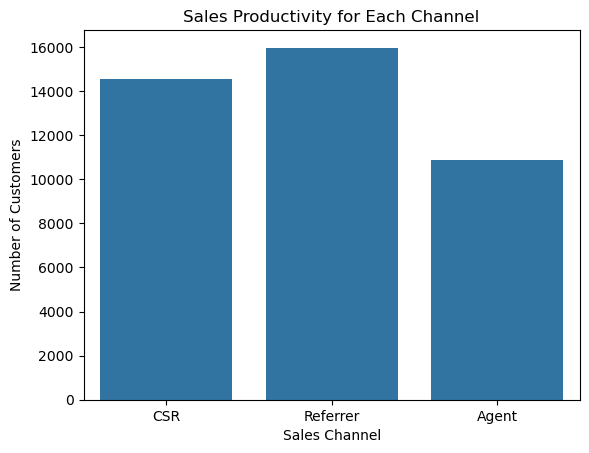

In [12]:
# Create bar chart of sellers according to cooker sales
base_color = sns.color_palette()[0]
sns.countplot(data=merged_data, x='type', color = base_color)
plt.ylabel('Number of Customers')
plt.xlabel('Sales Channel')
plt.title('Sales Productivity for Each Channel');

- Which channel is the most productive?
> The most productive channel is the Referrer with 970 cooker customers.

- Is the most productive channel also the most efficient channel? Why or why not?
> The most productive channel is not the most efficient channel. The most efficient channel would be a measure of which channel made the most of it's avaiable resources. From the plot, we see that Referrer has 970 sales, although there are over 10,000 customers who are under the Referrer channel. Meanwhile, there are only 50 CSR and they got 925 sales. If we are to rank sales channels according to efficiency, CSR would be top, followed by Agent, which are 500, and Referrer would be the least efficient.

- What opportunities might exist to increase sales productivity?
> BURN could invest in recruiting and training more CSR and expanding the sale territory to cover more ground. Also some training and increasing the commision rates for Agents and Referrers channels might be a good way to incentivize them to sell more cookers. When there are more CSR, there will be more Referrers since they are customers for promote the cookers.

- What additional data would you want to better answer the above questions?
> To gain deeper insights into the performance of BURN's sales channels, we would need information on customer demographics such including age, income and household size to better tailor marketing efforts according to customer demographics. We could also need customer satisfaction survey data to identify potential areas for improvement and optimize sale strategies. Also, collecting data on each sale channel representatives would be helpful to identify attributes of top performers that can be used to optimize training material.

### What is the average monthly fuel consumption per cooker for each channel? 

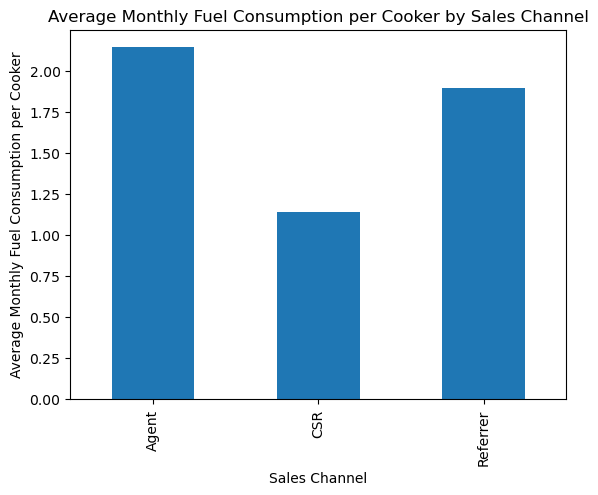

In [13]:
# Calculate the total fuel consumption for each cooker
merged_data['total_fuel_consumption'] = merged_data['litres_sold'] * merged_data['tx_date'].dt.daysinmonth / 30

# Calculate the average monthly fuel consumption per cooker for each sales channel
sales_channel_avg_fuel_consumption = merged_data.groupby('type')['total_fuel_consumption'].mean()

# Create a bar chart showing average monthly fuel consumption per cooker for each sales channels
sales_channel_avg_fuel_consumption.plot(kind='bar', color=base_color)
plt.title('Average Monthly Fuel Consumption per Cooker by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Average Monthly Fuel Consumption per Cooker')
plt.show();

- Which channel produces the most satisfied customers?
> The Agent sales channel produces the most satified customers who make the most use of their cooker and consume the most fuel.

- Why might fuel consumption differ by sales channel?
> The Agent sales channel has have outlets where BURNpoint fuel dispensers are installed so it will be easy for customers to quickly go for a refill where they run out of fuel which is why they have the highest average monthly fuel consumption. Referrer sales channel, which has the second highest average monthly fuel consumption are already customers so they need the fuel to use their cookers. CSR are mostly just associated with selling cookers which accounts for their low average.

- What opportunities might exist to increase fuel consumption?
> Increasing the customer base will directly increase the fuel consumption. Therefore BURN should focus on increasing Sales Channel productivity through training of Sales Channels and expanding distribution territory which will lead to more cooker sales and invariably more fuel consumption. Also, using marketing campaigns and promotions with discounts will also catch the attention of users. Another opportunity will be developing and introducing new cooking accessories like baking pans will make customers use their cookers more which will lead to more fuel consumption.

- What additional data would you want to better answer the above questions?
> Additional data including customer demographics will be helpful to identify those customers who consume the most fuel so BURN can tailor marketing campaigns that will prompt action in those groups of customers. Data containing information on cooker usage will also be useful to gain insights on the factors that influence fuel consumption in households and will help BURN to work on strategies for increased usage.

In [14]:
merged_data.to_excel('AnalysticsSkillTest-Answer2.xlsx')